In [143]:
# Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
from IPython.display import display
from tweepy import OAuthHandler
%matplotlib inline

In [144]:
# Authorizing the API

def twitter_authorization():
    consumer_key = 'n1gDcWukWnKnWrjgiG3ehyMWj'
    consumer_secret = '7wnHaiE7xJcuHpep1a4wlXzy3b0WpIUKr8nkKv4YqGqljMwUNf'
    access_token = '75494022-QzpwSyZ9H6bzsdTEPZjD3nW6SkOOxVJhoW4bKNAkb'
    access_secret = 'yBQwPrn61ZDmUoco9cksNwrq8sBiqLAMQUaAeoRcScPzz'
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth)
    
    return api

In [145]:
extractor = twitter_authorization()


VentureCoinist = extractor.user_timeline(screen_name="VentureCoinist",since='2018-06-27', until='2018-06-28')
bennydoda01 = extractor.user_timeline(screen_name="bennydoda01",since='2018-06-27', until='2018-06-28')
Coin_Shark = extractor.user_timeline(screen_name="Coin_Shark",since='2018-06-27', until='2018-06-28')
Crypto_Skipper = extractor.user_timeline(screen_name="Crypto_Skipper",since='2018-06-27', until='2018-06-28')
BitcoinMagazine = extractor.user_timeline(screen_name="BitcoinMagazine",since='2018-06-27', until='2018-06-28')


In [147]:
data1 = pd.DataFrame(data=[tweet.text for tweet in VentureCoinist], columns=['Tweets'])
data2 = pd.DataFrame(data=[tweet.text for tweet in bennydoda01], columns=['Tweets'])
data3 = pd.DataFrame(data=[tweet.text for tweet in Coin_Shark], columns=['Tweets'])
data4 = pd.DataFrame(data=[tweet.text for tweet in Crypto_Skipper], columns=['Tweets'])
data5 = pd.DataFrame(data=[tweet.text for tweet in BitcoinMagazine], columns=['Tweets'])

<class 'pandas.core.frame.DataFrame'>


In [148]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [151]:
# Reassign variables to their sentiment analysis score

VentureCoinist = np.array([ analyze_sentiment(tweet) for tweet in data1['Tweets'] ]).mean()
print (VentureCoinist)
bennydoda01 = np.array([ analyze_sentiment(tweet) for tweet in data2['Tweets'] ]).mean()
Coin_Shark = np.array([ analyze_sentiment(tweet) for tweet in data3['Tweets'] ]).mean()
Crypto_Skipper = np.array([ analyze_sentiment(tweet) for tweet in data4['Tweets'] ]).mean()
BitcoinMagazine = np.array([ analyze_sentiment(tweet) for tweet in data5['Tweets'] ]).mean()


0.05


In [154]:
final_list = ('VentureCoinist','bennydoda01','Coin_Shark','Crypto_Skipper','BitcoinMagazine')
final_scores = (VentureCoinist,bennydoda01,Coin_Shark,Crypto_Skipper,BitcoinMagazine)

print (final_list)
print (final_scores)

('VentureCoinist', 'bennydoda01', 'Coin_Shark', 'Crypto_Skipper', 'BitcoinMagazine')
(0.05, 0.2, 0.45, 0.25, 0.05)


<BarContainer object of 5 artists>

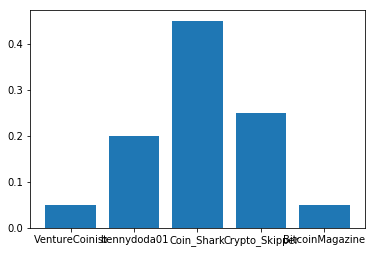

In [163]:
plt.bar(final_list,final_scores)